# PURPOSE
* The purpose of this notebook is to show some correlaton examples and OLS SLR examples
* Brandon Johnson

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

# CORRELATION

In [10]:
N = 100

x1 = np.linspace(-5,5,N) + np.random.randn(N)
x2 = x1 + np.random.randn(N)
x3 = x2 * -1
x4 = x1 + np.random.randn(N)*100

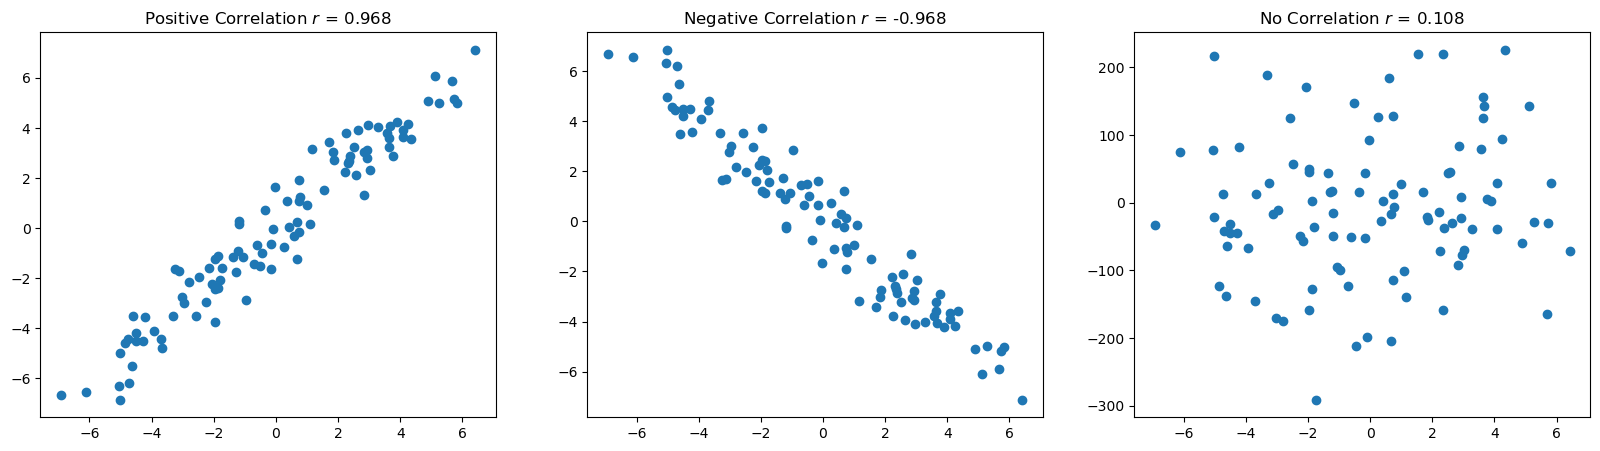

In [11]:
fig,axs = plt.subplots(1,3,figsize=(20,5))

X = [x2,x3,x4]
titles = ['Positive Correlation','Negative Correlation','No Correlation']

for i,ax in enumerate(axs.flatten()):
    ax.scatter(x1,X[i])
    corr = np.corrcoef(x1,X[i])[0,1]
    ax.set_title(f'{titles[i]} $r$ = {corr:.3f}')

# OLS SLR

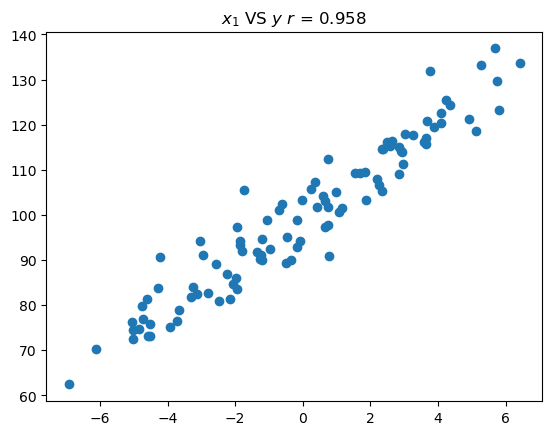

In [17]:
y = 100 + x1*5 + np.random.randn(N)*5

fig, ax = plt.subplots()
ax.scatter(x1,y)
corr = np.corrcoef(x1,y)[0,1]
ax.set_title(f'$x_1$ VS $y$ $r$ = {corr:.3f}')
plt.show()

In [23]:
reg = sm.OLS(endog=y,exog=sm.add_constant(x1)).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1107.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           3.33e-55
Time:                        12:43:38   Log-Likelihood:                -298.56
No. Observations:                 100   AIC:                             601.1
Df Residuals:                      98   BIC:                             606.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7619      0.484    206.150      0.000      98.802     100.722
x1             5.0678      0.152     33.273      0.000       4.766       5.370
==============================================================================
Omnibus:                        5.465   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                4.830
Skew:                           0.461   Prob(JB):                       0.0894
Kurtosis:                       3.557   Cond. No.                         3.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ANSCOMBE'S QUARTET

In [25]:
quartet = pd.read_csv('\\Anscombe_quartet_data.csv')

In [26]:
quartet

,x123,y1,y2,y3,x4,y4
0,10.0,8.04,9.14,7.46,8.0,6.58
1,8.0,6.95,8.14,6.77,8.0,5.76
2,13.0,7.58,8.74,12.74,8.0,7.71
3,9.0,8.81,8.77,7.11,8.0,8.84
4,11.0,8.33,9.26,7.81,8.0,8.47
5,14.0,9.96,8.10,8.84,8.0,7.04
6,6.0,7.24,6.13,6.08,8.0,5.25
7,4.0,4.26,3.10,5.39,19.0,12.50
8,12.0,10.84,9.13,8.15,8.0,5.56
9,7.0,4.82,7.26,6.42,8.0,7.91


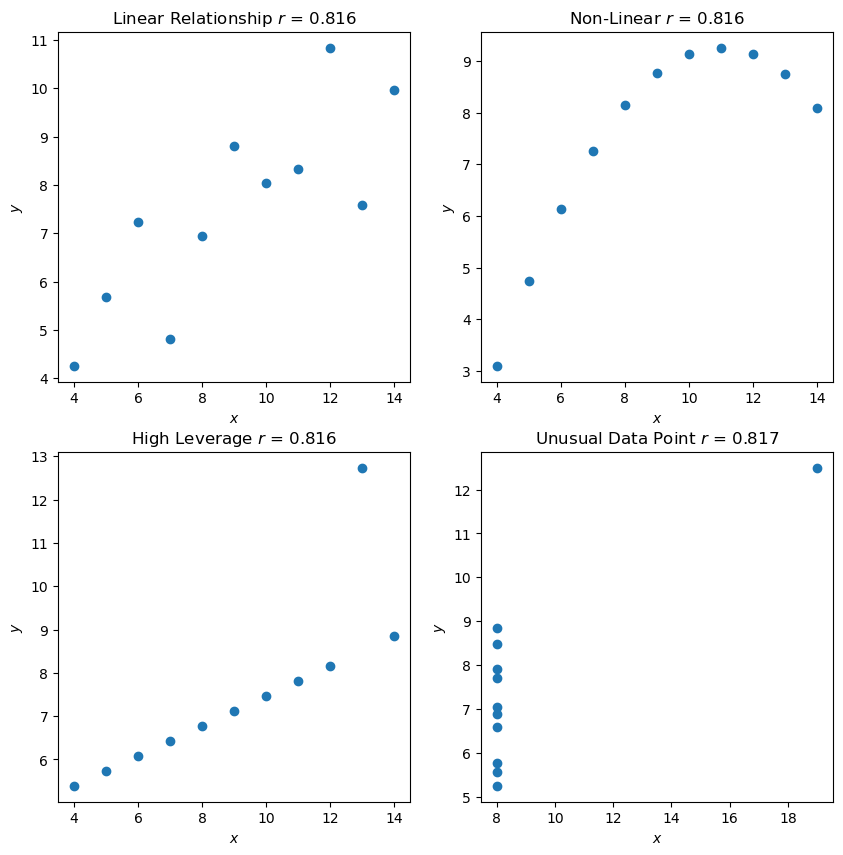

In [45]:

titles = ['Linear Relationship','Non-Linear', 'High Leverage']
fig, axs = plt.subplots(2,2, figsize=(10,10))

for i,ax in enumerate(axs.flatten()[:3]):
    ax.scatter(quartet.x123,quartet.iloc[:,i+1])
    corr = np.corrcoef(quartet.x123,quartet.iloc[:,i+1])[0,1]
    ax.set_title(f'{titles[i]} $r$ = {corr:.3f}')
    ax.set_ylabel('$y$')
    ax.set_xlabel('$x$')
    
axs[1,1].scatter(quartet.x4,quartet.y4)
corr = np.corrcoef(quartet.x4,quartet.y4)[0,1]
axs[1,1].set_title(f'Unusual Data Point $r$ = {corr:.3f}')
axs[1,1].set_ylabel('$y$')
axs[1,1].set_xlabel('$x$')
plt.show()

# OLS SLR EXAMPLE

In [46]:
N = 100
temp = np.linspace(40,100,N)
cost = 50 + 2*temp + np.random.randn(N)*10

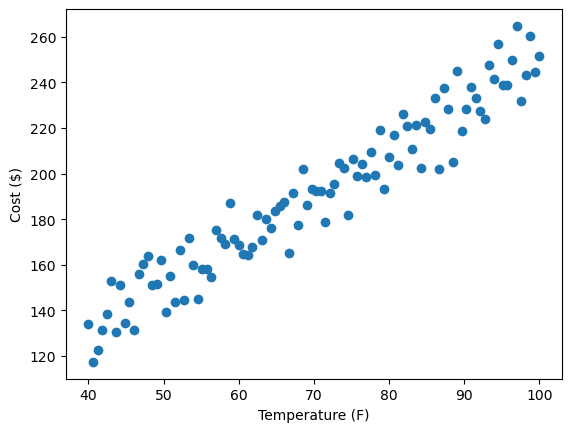

In [101]:
plt.scatter(temp,cost)
plt.xlabel('Temperature (F)')
plt.ylabel('Cost ($)')
# plt.title('Monthly Cooling Cost versus Temperature')
plt.show()

In [102]:
model = sm.OLS(endog=cost,exog=sm.add_constant(temp)).fit()

In [103]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1267.
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           7.50e-58
Time:                        16:38:58   Log-Likelihood:                -368.44
No. Observations:                 100   AIC:                             740.9
Df Residuals:                      98   BIC:                             746.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.0147      4.014     12.957      0.000      44.048      59.981
x1             1.9802      0.056     35.590      0.000       1.870       2.091
==============================================================================
Omnibus:                        1.520   Durbin-Watson:                   2.539
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.268
Skew:                          -0.084   Prob(JB):                        0.530
Kurtosis:                       2.474   Cond. No.                         298.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Random Residuals**

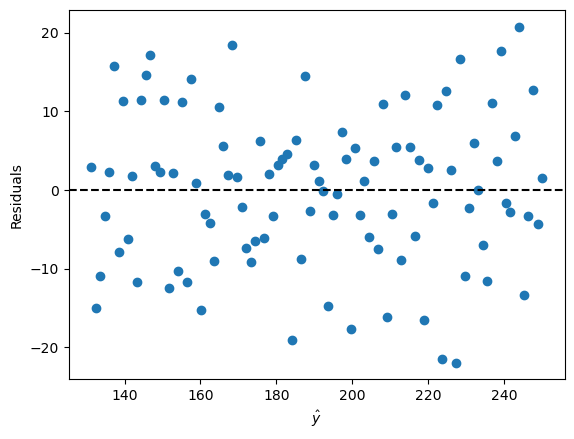

In [104]:
y_pred = model.predict()

resid = cost - y_pred

plt.scatter(y_pred,resid)
plt.axhline(0,c='k',ls='--')
plt.ylabel('Residuals')
plt.xlabel('$\\hat{y}$')
plt.show()

**Normally Distributed Residuals**

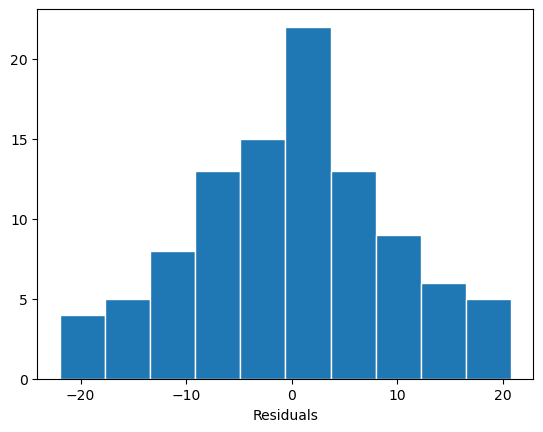

In [105]:
plt.hist(resid, edgecolor='w')
plt.xlabel('Residuals')
plt.show()

**Line of Best Fit**

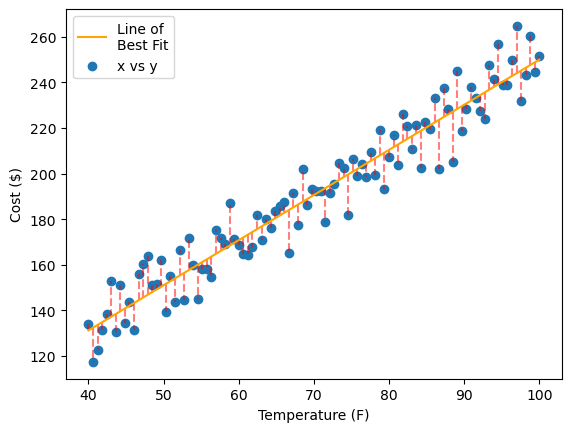

In [106]:
plt.plot([temp,temp],[y_pred,cost],color='red',alpha=.5,ls='--')
plt.plot(temp,y_pred, color='orange',label='Line of \nBest Fit')
plt.scatter(temp,cost,label='x vs y')
plt.xlabel('Temperature (F)')
plt.ylabel('Cost ($)')
plt.legend()
plt.show()

**Biased Regression Line of Fit**

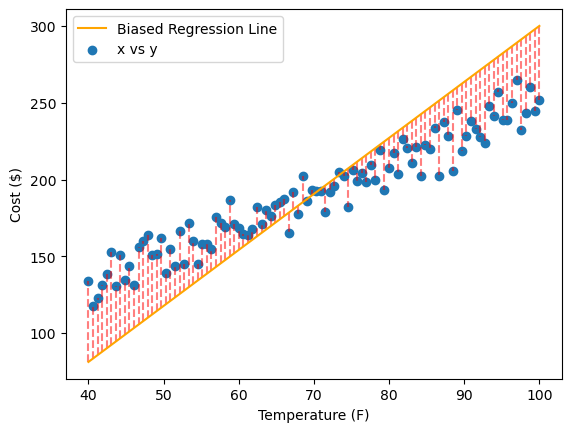

In [112]:
bias = np.linspace(-50,50,len(cost))
biased_preds = y_pred + bias

plt.plot([temp,temp],[biased_preds,cost],color='red',alpha=.5,ls='--')
plt.plot(temp,biased_preds, color='orange',label='Biased Regression Line')
plt.scatter(temp,cost,label='x vs y')
plt.xlabel('Temperature (F)')
plt.ylabel('Cost ($)')
plt.legend()
plt.show()

# ASSIGNMENT

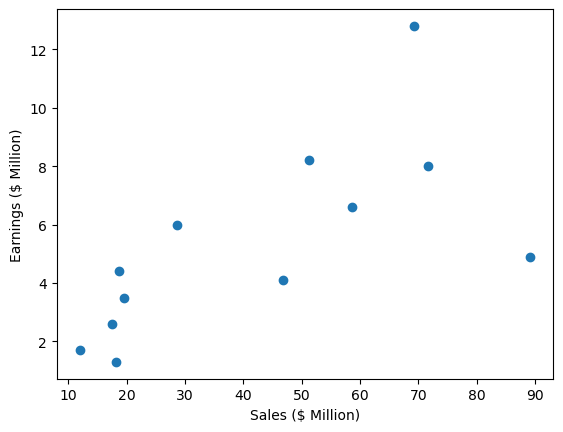

In [99]:
sales = [89.2,18.6,18.2,71.7,58.6,46.8,17.5,11.9,19.6,51.2,28.6,69.2]
earnings = [4.9,4.4,1.3,8,6.6,4.1,2.6,1.7,3.5,8.2,6,12.8]

plt.scatter(sales,earnings)
plt.xlabel('Sales ($ Million)')
plt.ylabel('Earnings ($ Million)')
plt.show()

In [89]:
np.corrcoef(sales,earnings)[0,1]

0.6734992524898942

In [90]:
model = sm.OLS(endog=earnings,exog=sm.add_constant(sales)).fit()
model.summary()

C:\Users\JB\anaconda3\envs\DS_Feb2023\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     8.302
Date:                Fri, 17 Feb 2023   Prob (F-statistic):             0.0164
Time:                        14:33:00   Log-Likelihood:                -27.013
No. Observations:                  12   AIC:                             58.03
Df Residuals:                      10   BIC:                             59.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8517      1.413      1.311      0.219      -1.296       4.999
x1             0.0836      0.029      2.881      0.016       0.019       0.148
==============================================================================
Omnibus:                        1.876   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.391   Jarque-Bera (JB):                0.345
Skew:                           0.358   Prob(JB):                        0.842
Kurtosis:                       3.422   Cond. No.                         94.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

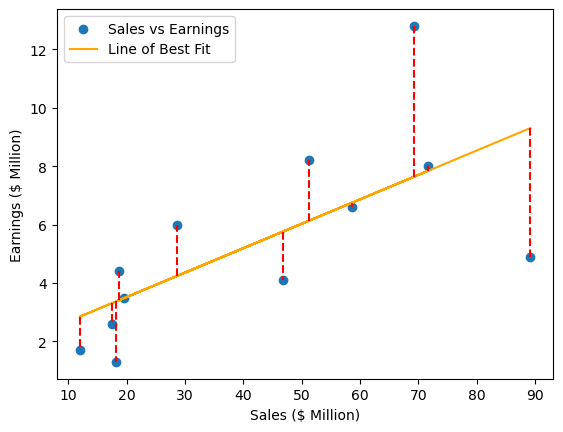

In [98]:
y_pred = model.predict()

plt.scatter(sales,earnings,label='Sales vs Earnings')
plt.plot(sales,y_pred,c='orange',label='Line of Best Fit')
resid = earnings - y_pred
plt.plot([sales,sales],[y_pred,earnings],c='r',ls='--')
plt.xlabel('Sales ($ Million)')
plt.ylabel('Earnings ($ Million)')
plt.legend()
plt.show()